In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import Counter

In [3]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

#### Rule 54
Asites=1-4, Bsites=100, steps=500, MeasStag 1-4

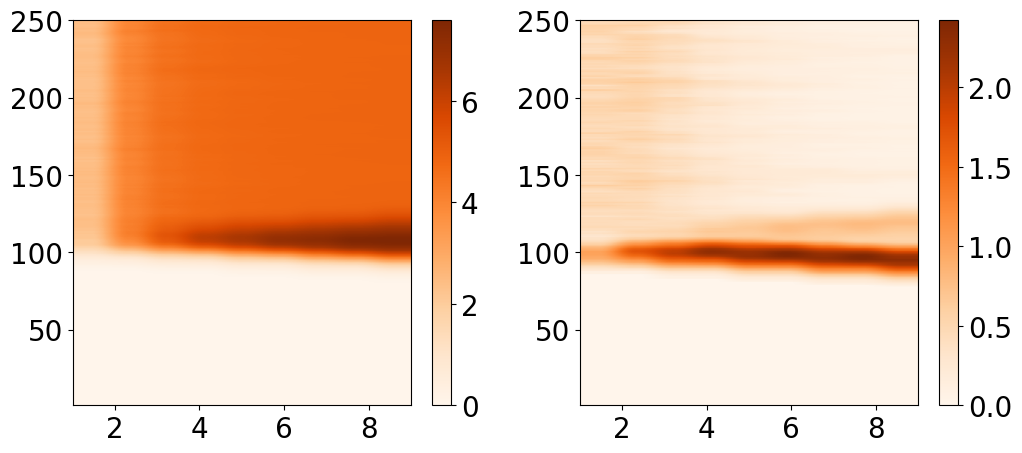

In [8]:
file_name = "../data/240226/240226_4"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

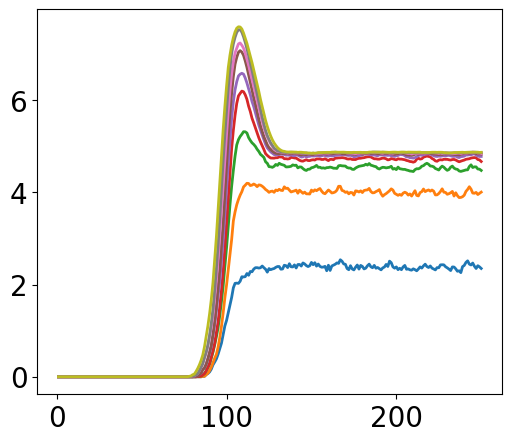

In [9]:
plt.figure(figsize=(6,5))
for i in range(0,len(nmeas_l),1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    # plt.xlim([0,200])
    # plt.xscale('log')

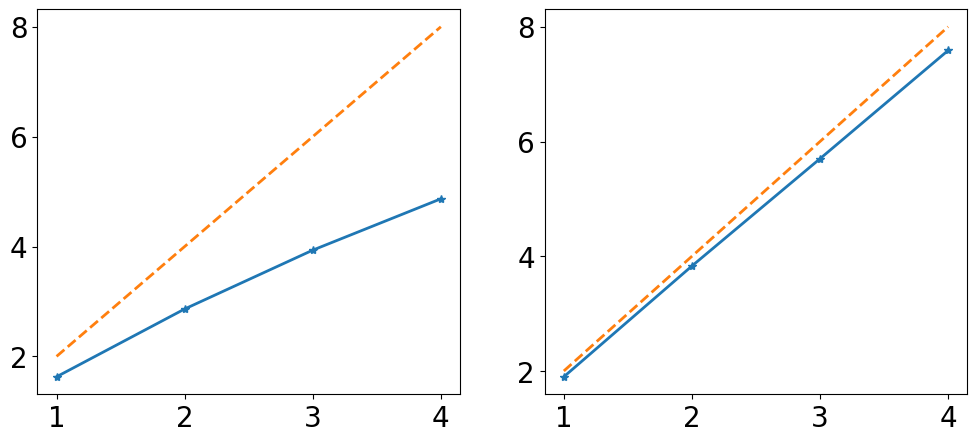

In [18]:
nAsite_l = [1,2,3,4]
Smin_l = np.zeros(len(nAsite_l))
Smax_l = np.zeros(len(nAsite_l))

for i in nAsite_l:
    file_name = "../data/240226/240226_%d"%(i)
    nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
    
    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
    S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))
    Smin_l[i-1] = np.average(S_ave_arr[-1,-10:])
    Smax_l[i-1] = np.max(S_ave_arr[-1,:])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(nAsite_l,Smin_l,"*-")
plt.plot(nAsite_l,2*np.array(nAsite_l),"--")
plt.subplot(1,2,2)
plt.plot(nAsite_l,Smax_l,"*-")
plt.plot(nAsite_l,2*np.array(nAsite_l),"--")